# Week 3 Lab Task

## More Jupyter Tips

Hopefully by this week, you are growing more comfortable with starting Jupyter Notebooks and adding/editing cells. Remember that the keyboard shortcuts are invaluable: running a cell with `Ctrl+Enter`, or adding a new cell below with `B` (in command mode).

Two tricks to try this week: autocompletion and retrieving documentation.

**Autocomplete**

If you start typing a known object or function into Jupyter, you can press `TAB` to finish it. This is especially useful for seeing what functions are available.

In [ ]:
test = "this is a string"

In [ ]:
?test.center

Above, I've set a string to `test`. If I type `te` then press tab, it will complete the word. This is especially useful for long variable names that you don't want to keep typing. Note that it only completed because there no other options: in that case, there's a scrollable list of candidates for what you might be looking for.

The `test` variable is a string. Last week, we saw a two functions that can be performed on strings: `split()` and `join()`. If you would like to see what other options there are for strings, try typing `test.` then press TAB. Magic!

<img src="../images/autofill.png" width=250>

** Documentation reference **

If you want to look up information about a function, you can precede the code running that function with a `?`. For example, if I want to learn how I would use `split()` on `test`, I can type:

In [ ]:
?test.split()

This will open a panel that looks like this in Jupyter:

<img src="../images/info.png" width=400>

The documentation is only as good as what the library is documented, so some libraries might be more or less detailed in this feature.

*Questions*

- 1) What does `test.isalpha()` do? Copy the documentation string.
- 2) Strings have access to a function (whose name starts with a `ce`) that will let you change "HEADING" to "====HEADING====" (that is, padding with `=` to make the string 15 characters wide). What's the code to do that? (tip: this is an auto-fill question!)

## Intro to the NLTK

This week we'll start using the Natural Language toolkit. For the remaining questions, follow along with:

- [Getting NLTK for Text Processing](https://github.com/sgsinclair/alta/blob/2acb6ed09f298f631e4025d33f062f980758a1ce/ipynb/GettingNltk.ipynb), Art of Literary Text Analysis

Two notes. First, the tutorial suggests downloading "all" packages. However, install the packages from 'book' should be sufficient for now.

Also, skip the text processing section, which deals with automatically downloading and cleaning a book. Instead, download this [already-cleaned version of Mary Shelley's Frankenstein](https://raw.githubusercontent.com/organisciak/Text-Mining-Course/master/data/frankenstein.txt), put it into the same folder as your notebook, and load it as follows:

In [ ]:
with open("../data/frankenstein.txt") as f:
    frankensteinString = f.read()

Here's a quick way of viewing part of our string: the first 250 characters. Notice that you can select subsets of strings like you select subsets of lists. 

In [ ]:
frankensteinString[0:250]

'ï»¿Letter 1\n\nSt. Petersburgh, Dec. 11th, 17--\n\nTO Mrs. Saville, England\n\nYou will rejoice to hear that no disaster has accompanied the\ncommencement of an enterprise which you have regarded with such evil\nforebodings.  I arrived here yesterday, and my'

 > Side-note for the Python novice: you don't actually need the zero in [0:250]. If left blank, like '[:250]`, Python will assume "from the very start", which is the same as using a 0. If you leave the second part blank, Python will assume "until the very end".
    
For the rest of the ALTA chapter, follow along using `frankensteinString` string instead of `goldBugString`.

**Q3**: Use the `word_tokenize` function on Frankenstein, as shown in ALTA. What are tokens 39:67? Hint: this is a full sentence. Include your code.

In [ ]:
import nltk
frankenstein_tokens = nltk.word_tokenize(frankensteinString)
frankenstein_tokens[39:67]

['I',
 'arrived',
 'here',
 'yesterday',
 ',',
 'and',
 'my',
 'first',
 'task',
 'is',
 'to',
 'assure',
 'my',
 'dear',
 'sister',
 'of',
 'my',
 'welfare',
 'and',
 'increasing',
 'confidence',
 'in',
 'the',
 'success',
 'of',
 'my',
 'undertaking',
 '.']

**Q4**: Create a sample of only the tokens where the first character is an alphabetical character. In this sample, what are tokens 1215:1221? Again, this will be a sentence, but won't include punctuation as tokens. Include your code.

In [ ]:
cleaned_tokens = [word for word in frankenstein_tokens if word[0].isalpha()]
cleaned_tokens[1215:1221]

['I', 'am', 'by', 'frost', 'and', 'snow']

 _For the next questions use the list of tokens that start with an alphabetical character._
 
**Q5**: What are the ten most frequent words in this book? Create a frequency distribution of the words from question 4, then tabulate the top 10 words. Include your code.

In [ ]:
cleaned_dist = nltk.FreqDist(cleaned_tokens)
cleaned_dist.tabulate(10)

 the  and    I   of   to   my    a   in  was that 
3908 2936 2844 2638 2080 1634 1345 1080 1018 1005 


**Q6**: After case-folding, what are the ten most frequent words in this book? Include your code.

In [ ]:
folded_tokens = [word.lower() for word in cleaned_tokens]
folded_dist = nltk.FreqDist(cleaned_tokens)
folded_dist.tabulate(10)

 the  and    I   of   to   my    a   in  was that 
3908 2936 2844 2638 2080 1634 1345 1080 1018 1005 


**Q7**: Rewrite this list comprehension as a `for` loop (what ALTA called technique 1): `[word for word in listOfWords if word.find('-') >= 0]`. No output necessary, just the code, but feel free to test it out.

```python
tokens = []
for word in listOfWords:
    if word.find('-') >= 0:
        tokens.append(word)
```

**Q8**: We're going to use a customized stoplist. First, load the NLTK stoplist, and add the words 'could', 'would', 'upon', and 'yet' to the stoplist. What are the top ten case-folded words when stopping against the stoplist. Include your code and paste the tabulated output.

In [ ]:
l1 = ['this', 'is', 'a', 'list']
l2 = ['another', 'list']

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
my_stopwords = stopwords + ['could', 'would', 'upon', 'yet']
stopped_words = [word for word in folded_tokens if word not in my_stopwords]
stopped_dist = nltk.FreqDist(stopped_words)
stopped_dist.tabulate(10)

   one    man father   life  every  first  might  shall   eyes   said 
   206    136    131    115    109    108    108    105    104    102 


__Questions__
 
Using the autocomplete in Jupyter, you may notice that a list of tokens converted to a `FreqDist` object has more methods than just `tabulate()`. One really cool one is `plot()`.

`plot` gives you a visualization of the top frequency words. However, you may notice that if you try to run it, the visualization doesn't show up.

It _is_ created, but Jupyter just doesn't know that you want the visualization shown _within_ the notebook. To turn that option on, run the following line of code:

In [ ]:
%matplotlib inline

This is only necessary once: it tells Jupyter to show plots 'inline' (ie. inside the notebook).

**Questions**

**Q9**: Write the code to plot the top forty stoplisted, casefolded words (from question 8). And again, remember the docs! The output will look similar to this:

![test](../images/freqplot.png)

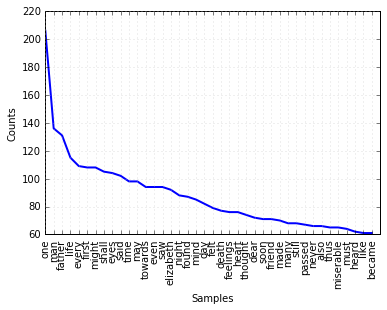

In [ ]:
%matplotlib inline
stopped_dist.plot(40)

**Q10**: Enter the first 5 concordances for the word "monster" in the original token list - the list straight from word_tokenize that included punctuation and numbers - narrowing the search to a 49-characters window. Include the code. Tip: See the docs for the concordance tool in Jupyter.

In [ ]:
frankenstein_text = nltk.Text(frankenstein_tokens)
frankenstein_text.concordance("monster", width=49, lines=5)

Displaying 5 of 30 matches:
tch -- the miserable monster whom I had created .
eaded to behold this monster , but I feared still
 I imagined that the monster seized me ; I strugg
fe . The form of the monster on whom I had bestow
think that I was the monster that he said I was .
